In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv(r'C:\Users\sanjil\Desktop\New folder\Train\Train.csv')
dfy=pd.read_csv(r'C:\Users\sanjil\Desktop\ytrain.csv')
x=np.array(dfx)
y=np.array(dfy)
print(x.shape)
print(y.shape)

(1600, 5)
(1600, 1)


In [3]:
x=x-x.mean()/x.std()
y=y.reshape((-1,))
print(x.shape)
print(y.shape)

(1600, 5)
(1600,)


In [57]:
def hypothesis(X,theta,n):
    m=X.shape[0]
    
    h=np.sum(np.matmul(X,theta))
    return h
#error
def error(X,Y,theta,n):
    m=X.shape[0]
    err=0
    for i in range(m):
        h=hypothesis(X[i],theta,n)
        err+= (y[i]-h)**2
        
    return err
#gradient
def gradient(X,Y,theta,n):
    m=X.shape[0]
    grad=np.zeros((n+1,1))
    for i in range(m):
        h=hypothesis(X[i],theta,n)
        grad[0]+=(y[i]-h)
        for j in range(1,(n+1),1):
            grad[j]+=np.sum(np.dot((y[i]-h),x[j]))
    return grad
#gradient descent
def gradientdescent(X,Y,n,lr=0.0001):
    theta=np.ones((n+1,1))
    itr=0
    err_list=[]
    max_itr=3000
    while itr<max_itr:
        e=error(X,Y,theta,n)
        grad=gradient(X,Y,theta,n)
        
        err_list.append(e)
        for i in range((n+1)):
            theta[i]=theta[i]-lr*grad[i]
        itr+=1
    return theta,err_list
        
    


In [58]:
final_theta,err_list=gradientdescent(x,y,4)
print(err_list)

[19059041.422020286, 19018462.55324245, 18978359.155523907, 18938725.082972553, 18899554.27480093, 18860840.754097253, 18822578.62661459, 18784762.079577874, 18747385.380508326, 18710442.87606563, 18673928.99090706, 18637838.22656321, 18602165.16033096, 18566904.44418183, 18532050.803687554, 18497599.03696054, 18463544.013610642, 18429880.67371691, 18396604.02681478, 18363709.150897946, 18331191.191435147, 18299045.36040155, 18267266.935323857, 18235851.258340407, 18204793.735273935, 18174089.83471924, 18143735.087143306, 18113725.08399924, 18084055.476853073, 18054721.976523206, 18025720.352232847, 17997046.430774987, 17968696.095688947, 17940665.28645012, 17912949.99767057, 17885546.278312135, 17858450.230910618, 17831658.010811828, 17805165.825418178, 17778969.933447126, 17753066.64419993, 17727452.316841315, 17702123.359689694, 17677076.22951802, 17652307.43086449, 17627813.515353516, 17603591.081026915, 17579636.771684486, 17555947.276234586, 17532519.32805389, 17509349.704356782,

In [59]:
print(final_theta)

[[-5.71210058]
 [15.49631529]
 [-4.58345096]
 [11.59880503]
 [23.10868039]]


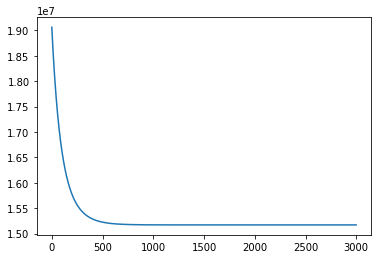

In [60]:
plt.plot(err_list)
plt.show()

In [61]:
xt=pd.read_csv(r'C:\Users\sanjil\Desktop\New folder\Test.csv')
xtest=np.array(xt)
print(xtest.shape)

(400, 5)


In [64]:
m = xtest.shape[0]
ypred=[]
for i in range(m):
    h=hypothesis(xtest[i],final_theta,4)
    ypred.append(h)
yfinal=np.array(ypred).reshape((400,1))

yfinal=pd.DataFrame(yfinal,columns=['Y']).to_csv("solution6.csv")